# Twitter Data Sentiment Analysis

# -------------------------------------Contents ----------------------------------------------------

# 1. Data Cleaning

# 2. Exploratory  Analysis

# 3. Model Preparation

# 4. Model Implementation

# 5. Results

Sentiment Analysis is a branch of Natural Language Processing (NLP) that allows us to determine algorithmically whether a statement or document is “positive” or “negative”.

# -------- Importing necessary libraries--------

In [ ]:
import pandas as pd
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup
import scrapy as sp
import requests
from scrapy import Selector
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk 
import string
from nltk import word_tokenize
from wordcloud import WordCloud
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter, OrderedDict
import operator
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#reading the csv files
sentiments = pd.read_csv('Sentiment.csv')
ce_tweets = pd.read_csv('Canadian_elections_2019.csv')

In [ ]:
#Displaying the dataset - Sentiment Analysis (Generic Tweets)
sentiments

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
5,Negative,"finished watching Lost 514.... oh Faraday, pit..."
6,Positive,Hoping for a nice day today!
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain..."
8,Positive,@GiggyPig you're not the only one who likes de...
9,Negative,is at work waiting for shortlisting results a...


In [ ]:
#Displaying the dataset- Canadian Election 2019 tweets
ce_tweets

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


In [ ]:
#Checking sentiments dataset for any null values
sentiments.isnull().any()

sentiment    False
text          True
dtype: bool

In [ ]:
#Checking Canadian elections 2019 dataset for any null values
ce_tweets.isnull().any() 

sentiment          False
negative_reason     True
text               False
dtype: bool

In [ ]:
#Dropping the null values in the text for Sentiments dataset
sentiments.dropna()

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
5,Negative,"finished watching Lost 514.... oh Faraday, pit..."
6,Positive,Hoping for a nice day today!
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain..."
8,Positive,@GiggyPig you're not the only one who likes de...
9,Negative,is at work waiting for shortlisting results a...


# -----------1. Data Cleaning------------

Data Cleaning guidelines
1. All html tags and attributes (i.e., /<[^>]+>/) are removed.
2. Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
3. All URLs are removed.
4. All characters in the text are in lowercase.
5. All stop words are removed. Be clear in what you consider as a stop word.
6. If a tweet is empty after pre-processing, it should be preserved as such.

In [ ]:
#Creating user-defined function for cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

**1. Removing the twitter user names**

In [ ]:
#Converting the text in the sentiments to string type
sentiments['text'] = sentiments.text.astype('str')
# removing usernames from tweets- Sentiments dataset
sentiments['user_names_removed'] = np.vectorize(remove_pattern)(sentiments['text'], "@[\w]*") 
sentiments

,sentiment,text,user_names_removed
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,RT : They tried to take you out &amp; your po...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...","Damn i'm jealous, i wanna watch the fight i ..."
2,Positive,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...,"could i please get a shout out or anything, i..."
4,Positive,@salspizza just spotted ur message there Tony ...,just spotted ur message there Tony and have r...
5,Negative,"finished watching Lost 514.... oh Faraday, pit...","finished watching Lost 514.... oh Faraday, pit..."
6,Positive,Hoping for a nice day today!,Hoping for a nice day today!
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain...","huy, matulog ka na. hahah. CBroom ain't done ..."
8,Positive,@GiggyPig you're not the only one who likes de...,you're not the only one who likes deepness
9,Negative,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...


In [ ]:
# removing usernames from tweets- Canadian ELections 2019 tweets
ce_tweets['user_names_removed'] = np.vectorize(remove_pattern)(ce_tweets['text'], "@[\w]*") 
ce_tweets

,sentiment,negative_reason,text,user_names_removed
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","b""#AllWomanSpacewalk it's real!\n \n#Etobicoke..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h..."
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


**2. Removing punctuations, numbers and special characters**

In [ ]:
#removing the punctuations, numbers and special characters - Sentiments Dataset
sentiments['characters_removed'] = sentiments['user_names_removed'].str.replace("[^a-zA-Z#]", " ")
sentiments

,sentiment,text,user_names_removed,characters_removed
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,RT : They tried to take you out &amp; your po...,RT They tried to take you out amp your po...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...","Damn i'm jealous, i wanna watch the fight i ...",Damn i m jealous i wanna watch the fight i ...
2,Positive,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,I m listening The Beatles now They re great
3,Positive,@ddlovato could i please get a shout out or an...,"could i please get a shout out or anything, i...",could i please get a shout out or anything i...
4,Positive,@salspizza just spotted ur message there Tony ...,just spotted ur message there Tony and have r...,just spotted ur message there Tony and have r...
5,Negative,"finished watching Lost 514.... oh Faraday, pit...","finished watching Lost 514.... oh Faraday, pit...",finished watching Lost oh Faraday pit...
6,Positive,Hoping for a nice day today!,Hoping for a nice day today!,Hoping for a nice day today
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain...","huy, matulog ka na. hahah. CBroom ain't done ...",huy matulog ka na hahah CBroom ain t done ...
8,Positive,@GiggyPig you're not the only one who likes de...,you're not the only one who likes deepness,you re not the only one who likes deepness
9,Negative,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...


In [ ]:
#removing the punctuations, numbers and special characters - Canadian Elections 2019 tweets Dataset
ce_tweets['characters_removed'] = ce_tweets['user_names_removed'].str.replace("[^a-zA-Z#]", " ")
ce_tweets

,sentiment,negative_reason,text,user_names_removed,characters_removed
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we...",b So instead of your suggestion how about we...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","b""#AllWomanSpacewalk it's real!\n \n#Etobicoke...",b #AllWomanSpacewalk it s real n n#Etobicoke...
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO...",b #Brantford It s going to cost YOU BILLIO...
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","b""#Canada #CanadaElection2019 #CanadaVotes \n#...",b #Canada #CanadaElection #CanadaVotes n#...
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h...",b #Canada #taxpayers are sick amp tired of h...
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",b #CanadaVotes #elxn #cdnpoli FACTS ...
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",b #CDNmedia #elxn #cdnpoli #PPC Rocky Dong h...
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","b""#cdnpoli #elxn43 The Liberals ++ more than d...",b #cdnpoli #elxn The Liberals more than d...
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",b #chooseforward #cdnpoli #elxn nCanada Don...
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh...",b #CPCKinsellaGate nLet s see the receipts Wh...


**3. Text Normalization**

In [ ]:
#text normalization on Sentiments tweets dataset
tokenized_tweet_1 = sentiments['characters_removed'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet_1

0         [RT, They, tried, to, take, you, out, amp, you...
1         [Damn, i, m, jealous, i, wanna, watch, the, fi...
2         [I, m, listening, The, Beatles, now, They, re,...
3         [could, i, please, get, a, shout, out, or, any...
4         [just, spotted, ur, message, there, Tony, and,...
5         [finished, watching, Lost, oh, Faraday, pity, ...
6                        [Hoping, for, a, nice, day, today]
7         [huy, matulog, ka, na, hahah, CBroom, ain, t, ...
8         [you, re, not, the, only, one, who, likes, dee...
9         [is, at, work, waiting, for, shortlisting, res...
10        [Looks, good, Personal, and, yet, professional...
11        [ive, met, shaant, like, times, he, was, nice,...
12        [RT, Hmmm, GOP, warmongers, What, about, pover...
13        [yes, I, am, can, t, seem, to, get, it, off, t...
14        [What, a, Beautiful, day, in, Manchester, I, h...
15        [ooooh, coaching, football, that, sounds, AWES...
16        [I, finally, signed, up, for, 

In [ ]:
#text normalization on Canadian elections 2019 tweets dataset
tokenized_tweet_2 = ce_tweets['characters_removed'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet_2

0       [b, So, instead, of, your, suggestion, how, ab...
1       [b, #AllWomanSpacewalk, it, s, real, n, n#Etob...
2       [b, #Brantford, It, s, going, to, cost, YOU, B...
3       [b, #Canada, #CanadaElection, #CanadaVotes, n#...
4       [b, #Canada, #taxpayers, are, sick, amp, tired...
5       [b, #CanadaVotes, #elxn, #cdnpoli, FACTS, #Bla...
6       [b, #CDNmedia, #elxn, #cdnpoli, #PPC, Rocky, D...
7       [b, #cdnpoli, #elxn, The, Liberals, more, than...
8       [b, #chooseforward, #cdnpoli, #elxn, nCanada, ...
9       [b, #CPCKinsellaGate, nLet, s, see, the, recei...
10      [b, #Elxn, is, two, days, away, If, you, re, v...
11      [b, #ELXN, PREDICTION, If, Justin, Trudeau, s,...
12      [b, #ICYMI, #Analysis, How, will, Ford, Nation...
13      [b, #ICYMI, #Analysis, How, will, Ford, Nation...
14      [b, #Kinsella, runs, deep, w, #CPC, both, he, ...
15      [b, #LyingAndy, has, a, history, of, not, answ...
16      [b, #ThreadAlert, nHere, s, a, study, sheet, f...
17      [b, #U

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet_1 = tokenized_tweet_1.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
tokenized_tweet_1

0         [RT, they, tri, to, take, you, out, amp, your,...
1         [damn, i, m, jealou, i, wanna, watch, the, fig...
2          [I, m, listen, the, beatl, now, they, re, great]
3         [could, i, pleas, get, a, shout, out, or, anyt...
4         [just, spot, ur, messag, there, toni, and, hav...
5         [finish, watch, lost, oh, faraday, piti, you, ...
6                          [hope, for, a, nice, day, today]
7         [huy, matulog, ka, na, hahah, cbroom, ain, t, ...
8           [you, re, not, the, onli, one, who, like, deep]
9         [is, at, work, wait, for, shortlist, result, a...
10        [look, good, person, and, yet, profession, I, ...
11        [ive, met, shaant, like, time, he, wa, nice, e...
12        [RT, hmmm, gop, warmong, what, about, poverti,...
13        [ye, I, am, can, t, seem, to, get, it, off, to...
14        [what, a, beauti, day, in, manchest, I, haven,...
15        [ooooh, coach, footbal, that, sound, awesom, w...
16        [I, final, sign, up, for, twit

In [ ]:
#normalizing the tokenized tweets.
for i in range(len(tokenized_tweet_1)):
    tokenized_tweet_1[i] = ' '.join(tokenized_tweet_1[i])
    
sentiments['tokenized_tweet'] = tokenized_tweet_1
sentiments

,sentiment,text,user_names_removed,characters_removed,tokenized_tweet
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,RT : They tried to take you out &amp; your po...,RT They tried to take you out amp your po...,RT they tri to take you out amp your poll numb...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...","Damn i'm jealous, i wanna watch the fight i ...",Damn i m jealous i wanna watch the fight i ...,damn i m jealou i wanna watch the fight i love...
2,Positive,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,I m listening The Beatles now They re great,I m listen the beatl now they re great
3,Positive,@ddlovato could i please get a shout out or an...,"could i please get a shout out or anything, i...",could i please get a shout out or anything i...,could i pleas get a shout out or anyth i m a h...
4,Positive,@salspizza just spotted ur message there Tony ...,just spotted ur message there Tony and have r...,just spotted ur message there Tony and have r...,just spot ur messag there toni and have repli
5,Negative,"finished watching Lost 514.... oh Faraday, pit...","finished watching Lost 514.... oh Faraday, pit...",finished watching Lost oh Faraday pit...,finish watch lost oh faraday piti you elois ha...
6,Positive,Hoping for a nice day today!,Hoping for a nice day today!,Hoping for a nice day today,hope for a nice day today
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain...","huy, matulog ka na. hahah. CBroom ain't done ...",huy matulog ka na hahah CBroom ain t done ...,huy matulog ka na hahah cbroom ain t done yet ...
8,Positive,@GiggyPig you're not the only one who likes de...,you're not the only one who likes deepness,you re not the only one who likes deepness,you re not the onli one who like deep
9,Negative,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work wait for shortlist result and kick ...


In [ ]:
stemmer = PorterStemmer()

tokenized_tweet_2 = tokenized_tweet_2.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
tokenized_tweet_2

0       [b, So, instead, of, your, suggest, how, about...
1       [b, #allwomanspacewalk, it, s, real, n, n#etob...
2       [b, #brantford, It, s, go, to, cost, you, bill...
3       [b, #canada, #canadaelect, #canadavot, n#elxn,...
4       [b, #canada, #taxpay, are, sick, amp, tire, of...
5       [b, #canadavot, #elxn, #cdnpoli, fact, #blastf...
6       [b, #cdnmedia, #elxn, #cdnpoli, #ppc, rocki, d...
7       [b, #cdnpoli, #elxn, the, liber, more, than, d...
8       [b, #chooseforward, #cdnpoli, #elxn, ncanada, ...
9       [b, #cpckinsellag, nlet, s, see, the, receipt,...
10      [b, #elxn, is, two, day, away, If, you, re, vo...
11      [b, #elxn, predict, If, justin, trudeau, s, #l...
12      [b, #icymi, #analysi, how, will, ford, nation,...
13      [b, #icymi, #analysi, how, will, ford, nation,...
14      [b, #kinsella, run, deep, w, #cpc, both, he, a...
15      [b, #lyingandi, ha, a, histori, of, not, answe...
16      [b, #threadalert, nhere, s, a, studi, sheet, f...
17      [b, #u

In [ ]:
#normalizing the tokenized tweets.
for i in range(len(tokenized_tweet_2)):
    tokenized_tweet_2[i] = ' '.join(tokenized_tweet_2[i])
    
ce_tweets['tokenized_tweet'] = tokenized_tweet_2
ce_tweets

,sentiment,negative_reason,text,user_names_removed,characters_removed,tokenized_tweet
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we...",b So instead of your suggestion how about we...,b So instead of your suggest how about we agre...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","b""#AllWomanSpacewalk it's real!\n \n#Etobicoke...",b #AllWomanSpacewalk it s real n n#Etobicoke...,b #allwomanspacewalk it s real n n#etobicokeno...
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO...",b #Brantford It s going to cost YOU BILLIO...,b #brantford It s go to cost you billion for t...
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","b""#Canada #CanadaElection2019 #CanadaVotes \n#...",b #Canada #CanadaElection #CanadaVotes n#...,b #canada #canadaelect #canadavot n#elxn n nca...
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h...",b #Canada #taxpayers are sick amp tired of h...,b #canada #taxpay are sick amp tire of have th...
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",b #CanadaVotes #elxn #cdnpoli FACTS ...,b #canadavot #elxn #cdnpoli fact #blastfromthe...
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",b #CDNmedia #elxn #cdnpoli #PPC Rocky Dong h...,b #cdnmedia #elxn #cdnpoli #ppc rocki dong han...
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","b""#cdnpoli #elxn43 The Liberals ++ more than d...",b #cdnpoli #elxn The Liberals more than d...,b #cdnpoli #elxn the liber more than doubl wha...
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",b #chooseforward #cdnpoli #elxn nCanada Don...,b #chooseforward #cdnpoli #elxn ncanada don t ...
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh...",b #CPCKinsellaGate nLet s see the receipts Wh...,b #cpckinsellag nlet s see the receipt who pay...


**4. Removing the stop words**

In [ ]:
#Downloading the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Length of the standard set of stopwords in nltk library
len(set(stopwords.words('english')))


179

In [ ]:
#Reading the stop_words text file into python
with open('stop_words.txt', 'r') as f:
    extra_sw = f.read().splitlines()

In [ ]:
#Extending the stop_words list in nltk
stop_words = stopwords.words('english')
# print(len(stop_words))
stop_words.extend(extra_sw)

In [ ]:
#Length of the stopwords list after appending the given set of stop words to the existing ones in the nltk library
len(stop_words)

844

In [ ]:
#removing any short (stop) words in the Canadian elections 2019 tweets dataset
sentiments['stop_words_removed'] = sentiments['tokenized_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop_words)]))
sentiments

,sentiment,text,user_names_removed,characters_removed,tokenized_tweet,stop_words_removed
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,RT : They tried to take you out &amp; your po...,RT They tried to take you out amp your po...,RT they tri to take you out amp your poll numb...,RT tri amp poll number skyrocket voter matter ...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...","Damn i'm jealous, i wanna watch the fight i ...",Damn i m jealous i wanna watch the fight i ...,damn i m jealou i wanna watch the fight i love...,damn jealou wanna watch fight love ufc
2,Positive,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,I m listening The Beatles now They re great,I m listen the beatl now they re great,I listen beatl great
3,Positive,@ddlovato could i please get a shout out or an...,"could i please get a shout out or anything, i...",could i please get a shout out or anything i...,could i pleas get a shout out or anyth i m a h...,pleas shout anyth huge fan wait cd
4,Positive,@salspizza just spotted ur message there Tony ...,just spotted ur message there Tony and have r...,just spotted ur message there Tony and have r...,just spot ur messag there toni and have repli,spot ur messag toni repli
5,Negative,"finished watching Lost 514.... oh Faraday, pit...","finished watching Lost 514.... oh Faraday, pit...",finished watching Lost oh Faraday pit...,finish watch lost oh faraday piti you elois ha...,finish watch lost faraday piti elois hawk cold...
6,Positive,Hoping for a nice day today!,Hoping for a nice day today!,Hoping for a nice day today,hope for a nice day today,hope nice day today
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain...","huy, matulog ka na. hahah. CBroom ain't done ...",huy matulog ka na hahah CBroom ain t done ...,huy matulog ka na hahah cbroom ain t done yet ...,huy matulog ka hahah cbroom shape
8,Positive,@GiggyPig you're not the only one who likes de...,you're not the only one who likes deepness,you re not the only one who likes deepness,you re not the onli one who like deep,onli deep
9,Negative,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work wait for shortlist result and kick ...,work wait shortlist result kick hubbi


In [ ]:
#removing any short (stop) words in the Canadian elections 2019 tweets dataset
ce_tweets['stop_words_removed'] = ce_tweets['tokenized_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop_words)]))
ce_tweets

,sentiment,negative_reason,text,user_names_removed,characters_removed,tokenized_tweet,stop_words_removed
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we...",b So instead of your suggestion how about we...,b So instead of your suggest how about we agre...,So agre #canadian #women trust #andrewsch #con...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","b""#AllWomanSpacewalk it's real!\n \n#Etobicoke...",b #AllWomanSpacewalk it s real n n#Etobicoke...,b #allwomanspacewalk it s real n n#etobicokeno...,#allwomanspacewalk real n#etobicokenorth #city...
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO...",b #Brantford It s going to cost YOU BILLIO...,b #brantford It s go to cost you billion for t...,#brantford It cost billion year justin #elxn #...
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","b""#Canada #CanadaElection2019 #CanadaVotes \n#...",b #Canada #CanadaElection #CanadaVotes n#...,b #canada #canadaelect #canadavot n#elxn n nca...,#canada #canadaelect #canadavot n#elxn ncan de...
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h...",b #Canada #taxpayers are sick amp tired of h...,b #canada #taxpay are sick amp tire of have th...,#canada #taxpay sick amp tire hard earn donat ...
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",b #CanadaVotes #elxn #cdnpoli FACTS ...,b #canadavot #elxn #cdnpoli fact #blastfromthe...,#canadavot #elxn #cdnpoli fact #blastfromthepa...
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",b #CDNmedia #elxn #cdnpoli #PPC Rocky Dong h...,b #cdnmedia #elxn #cdnpoli #ppc rocki dong han...,#cdnmedia #elxn #cdnpoli #ppc rocki dong hand ...
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","b""#cdnpoli #elxn43 The Liberals ++ more than d...",b #cdnpoli #elxn The Liberals more than d...,b #cdnpoli #elxn the liber more than doubl wha...,#cdnpoli #elxn liber doubl wa promis nation de...
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",b #chooseforward #cdnpoli #elxn nCanada Don...,b #chooseforward #cdnpoli #elxn ncanada don t ...,#chooseforward #cdnpoli #elxn ncanada america ...
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh...",b #CPCKinsellaGate nLet s see the receipts Wh...,b #cpckinsellag nlet s see the receipt who pay...,#cpckinsellag nlet receipt pay warren kinsella...


In [ ]:
#Displaying the final dataset for generic Sentiments tweets dataset 
sentiments

,sentiment,text,user_names_removed,characters_removed,tokenized_tweet,stop_words_removed
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,RT : They tried to take you out &amp; your po...,RT They tried to take you out amp your po...,RT they tri to take you out amp your poll numb...,RT tri amp poll number skyrocket voter matter ...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...","Damn i'm jealous, i wanna watch the fight i ...",Damn i m jealous i wanna watch the fight i ...,damn i m jealou i wanna watch the fight i love...,damn jealou wanna watch fight love ufc
2,Positive,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,I m listening The Beatles now They re great,I m listen the beatl now they re great,I listen beatl great
3,Positive,@ddlovato could i please get a shout out or an...,"could i please get a shout out or anything, i...",could i please get a shout out or anything i...,could i pleas get a shout out or anyth i m a h...,pleas shout anyth huge fan wait cd
4,Positive,@salspizza just spotted ur message there Tony ...,just spotted ur message there Tony and have r...,just spotted ur message there Tony and have r...,just spot ur messag there toni and have repli,spot ur messag toni repli
5,Negative,"finished watching Lost 514.... oh Faraday, pit...","finished watching Lost 514.... oh Faraday, pit...",finished watching Lost oh Faraday pit...,finish watch lost oh faraday piti you elois ha...,finish watch lost faraday piti elois hawk cold...
6,Positive,Hoping for a nice day today!,Hoping for a nice day today!,Hoping for a nice day today,hope for a nice day today,hope nice day today
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain...","huy, matulog ka na. hahah. CBroom ain't done ...",huy matulog ka na hahah CBroom ain t done ...,huy matulog ka na hahah cbroom ain t done yet ...,huy matulog ka hahah cbroom shape
8,Positive,@GiggyPig you're not the only one who likes de...,you're not the only one who likes deepness,you re not the only one who likes deepness,you re not the onli one who like deep,onli deep
9,Negative,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work waiting for shortlisting results a...,is at work wait for shortlist result and kick ...,work wait shortlist result kick hubbi


In [ ]:
#Displaying the final dataset for Canadian Elections 2019 tweets dataset 
ce_tweets

,sentiment,negative_reason,text,user_names_removed,characters_removed,tokenized_tweet,stop_words_removed
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we...",b So instead of your suggestion how about we...,b So instead of your suggest how about we agre...,So agre #canadian #women trust #andrewsch #con...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","b""#AllWomanSpacewalk it's real!\n \n#Etobicoke...",b #AllWomanSpacewalk it s real n n#Etobicoke...,b #allwomanspacewalk it s real n n#etobicokeno...,#allwomanspacewalk real n#etobicokenorth #city...
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO...",b #Brantford It s going to cost YOU BILLIO...,b #brantford It s go to cost you billion for t...,#brantford It cost billion year justin #elxn #...
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","b""#Canada #CanadaElection2019 #CanadaVotes \n#...",b #Canada #CanadaElection #CanadaVotes n#...,b #canada #canadaelect #canadavot n#elxn n nca...,#canada #canadaelect #canadavot n#elxn ncan de...
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h...",b #Canada #taxpayers are sick amp tired of h...,b #canada #taxpay are sick amp tire of have th...,#canada #taxpay sick amp tire hard earn donat ...
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",b #CanadaVotes #elxn #cdnpoli FACTS ...,b #canadavot #elxn #cdnpoli fact #blastfromthe...,#canadavot #elxn #cdnpoli fact #blastfromthepa...
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...","b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",b #CDNmedia #elxn #cdnpoli #PPC Rocky Dong h...,b #cdnmedia #elxn #cdnpoli #ppc rocki dong han...,#cdnmedia #elxn #cdnpoli #ppc rocki dong hand ...
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...","b""#cdnpoli #elxn43 The Liberals ++ more than d...",b #cdnpoli #elxn The Liberals more than d...,b #cdnpoli #elxn the liber more than doubl wha...,#cdnpoli #elxn liber doubl wa promis nation de...
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",b #chooseforward #cdnpoli #elxn nCanada Don...,b #chooseforward #cdnpoli #elxn ncanada don t ...,#chooseforward #cdnpoli #elxn ncanada america ...
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh...",b #CPCKinsellaGate nLet s see the receipts Wh...,b #cpckinsellag nlet s see the receipt who pay...,#cpckinsellag nlet receipt pay warren kinsella...


# -----------2. Exploratory Analysis---------------

In [ ]:
#Exploring distribution of labels in Sentiments dataset
sentiments['sentiment'].value_counts()

Negative    71428
Positive    59241
Neutral      3142
Name: sentiment, dtype: int64

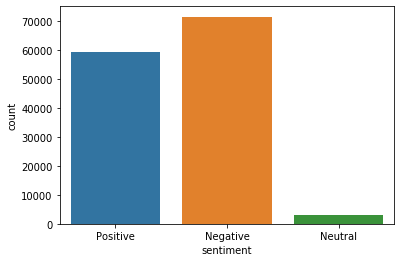

In [ ]:
#Plotting the distribution of the sentiments for Sentiments dataset
ax=sns.countplot(sentiments.sentiment)

In [ ]:
#Exploring distribution of labels in Canadian elections 2019 tweets dataset
ce_tweets['sentiment'].value_counts()

Positive    1127
Negative    1006
Name: sentiment, dtype: int64

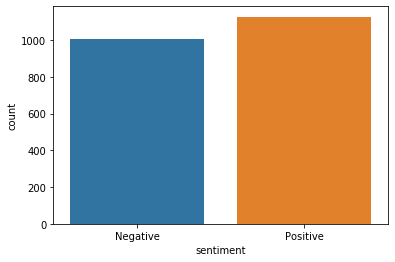

In [ ]:
#Plotting the distribution of the sentiments for Candian elections 2019 dataset
ax=sns.countplot(ce_tweets.sentiment)

Let's Label Encode the target variable of sentiment for both dataset in order to facilitate the using of Labels instead of strings.

In [ ]:
#Label encoding the sentiment for data exploration - Sentiments tweets dataset
sentiments['sentiment'] = sentiments['sentiment'].map({'Positive':1, 'Negative':0, 'Neutral':2})

In [ ]:
#Checking the value counts and whether the label encoding has been done
sentiments['sentiment'].value_counts()

0    71428
1    59241
2     3142
Name: sentiment, dtype: int64

Dropping the Neutral sentiments in the sentiments generic tweets dataset as they are of no use and further will create a problem in the model implementation, as they will convert the target variable of sentiment into a multiclass variable and also the analysis is to be done on positive or negative sentiments. 

In [ ]:
#Finding the index of the neutral sentiment values in the sentiments generic tweets dataset
indexes = sentiments[sentiments['sentiment'] == 2].index
#Dropping the neutral sentiment values in the sentiments generic tweets dataset
sentiments.drop(indexes, inplace=True)

In [ ]:
#Verifying whether the neutral sentiments data has been dropped or not. 
sentiments['sentiment'].value_counts()

0    71428
1    59241
Name: sentiment, dtype: int64

In [ ]:
#Label encoding the sentiment for data exploration - Canadian Elections 2019 tweets dataset
ce_tweets['sentiment'] = ce_tweets['sentiment'].map({'Positive':1, 'Negative':0})

In [ ]:
#Checking the value counts and whether the label encoding has been done
ce_tweets['sentiment'].value_counts()

1    1127
0    1006
Name: sentiment, dtype: int64

Classifying the tweets in the Canadian elections 2019 dataset based on the parties competiting in the elections and plotting the count of tweets as well as the wordcloud for identifying the keywords for a particular party accordingly.

In [ ]:
#Creating a user-defined function
def classify_tweets(tweet):
    """This function is used to classify the tweets for the three major parties contesting the elections"""

    #Defining key words for each party
    liberal =[ "justin", "justintrudeau","scheer","liber","liberals","lib","chooseforward","chooseforwardwithtrudeau"] #defining parties
    conservative=["andrew", "scheer", "conservative","andrew scheer","scheerli","andrewsch","conservatives","cpc","conserv"]
    NDP=["ndp","orange","ready4change","jagmeet","singh","jagmeet singh","initfory","national democratic party","uprisingh","jagmeetsingh","jagmeetjagmeetsingh","votendp"]
    other = ["green","freedom","bloc","quebecois", "may", "bernier","elizabeth"]

    # we only defined words in lowercase format, since all words in tweet line are converted to lowercase

    party = []
    for word in liberal:   
        if word in tweet:
            party.append('Liberal')

    for word in conservative:
         if word in tweet:
            party.append('Conservative')

    for word in NDP:
         if word in tweet:
            party.append('NDP')

    for word in other:
         if word in tweet:
            party.append('Other')

    #choose the most common party name for this tweet since there could be more than one classification for the same tweet
    if len(party) > 1:
        most_common = max(set(party), key=party.count)
        party = []
        party.append(most_common)
    elif len(party) == 0:
        party.append('Other')
    
    return party

In [ ]:
#Looping over all the canadian elections 2019 tweets text
tweets_total= []
other_tweet, conservative_tweet, liberal_tweet, ndp_tweet= [],[],[],[]
liberal_index, conservative_index, ndp_index= [],[],[]

for i in range(ce_tweets["stop_words_removed"].shape[0]):
    tweet_party= classify_tweets(ce_tweets["stop_words_removed"][i])[0]
    tweets_total.append(tweet_party)
    
    #Saving the tweets for each party for further investigation
    #Note that we are also saving the indexes for the respective tweets. This will come in handy later.
    if tweet_party=="Other":
        other_tweet.append(ce_tweets["stop_words_removed"][i])
    if tweet_party=="Liberal":
        liberal_tweet.append(ce_tweets["stop_words_removed"][i])
        liberal_index.append(i)
    if tweet_party=="Conservative":
        conservative_tweet.append(ce_tweets["stop_words_removed"][i])
        conservative_index.append(i)
    if tweet_party=="NDP":
        ndp_tweet.append(ce_tweets["stop_words_removed"][i])
        ndp_index.append(i)

**Approaching by making a dictionary for all of the tweets so as to make it easy for the data compilation and visualization. Using the OrderedDict module in Python as a regular dict does not track the insertion order, and iterating over it produces the values in an arbitrary order. In an OrderedDict, by contrast, the order the items are inserted is remembered and used when creating an iterator.**

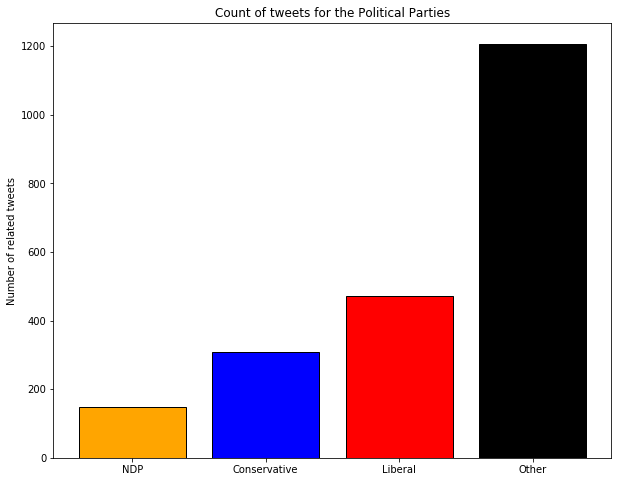

In [ ]:
#Using the operator and collections library to sort the dict values in ascending order of count of tweets
tweets_dict= OrderedDict(sorted(Counter(tweets_total).items(), key=operator.itemgetter(1)))

y= tweets_dict.values()
x= tweets_dict.keys()

plt.figure(figsize=(10, 8))
plt.bar(x,y,edgecolor="black",linewidth=1, color=['orange', 'blue', 'red', 'black'])
plt.ylabel("Number of related tweets")
plt.title("Count of tweets for the Political Parties")
plt.show()

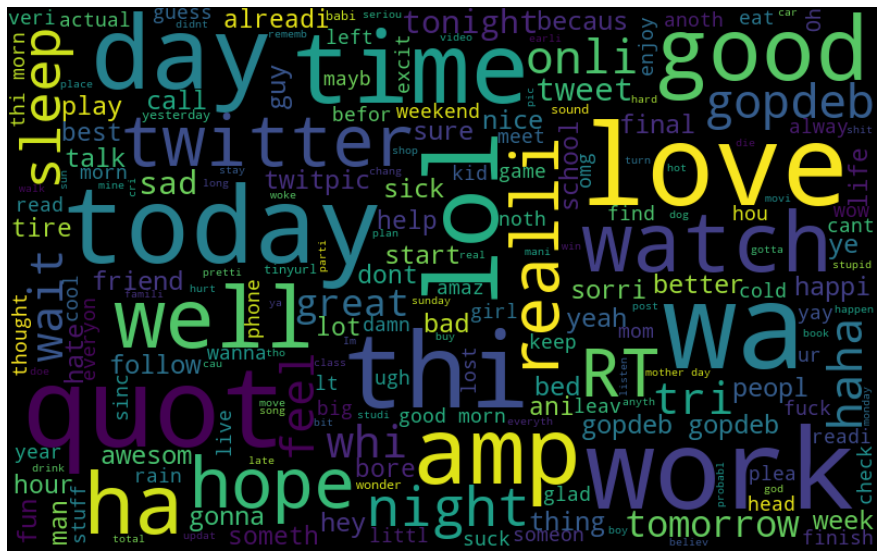

In [ ]:
#Making a wordcloud for Sentiments tweets dataset
all_words = ' '.join([text for text in sentiments['stop_words_removed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see that when sentiments dataset containing generic tweets is plotted, we get random words like amp,day,love,today ,work,quot which do not contribute in any way to our analysis.

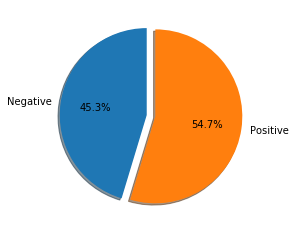

Number of generic tweets: 130669


In [ ]:
labels = "Negative", "Positive"
explode = (0, 0.1)
plt.pie(Counter(sentiments["sentiment"]).values(), explode= explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()
print("Number of generic tweets:", len(sentiments["sentiment"]))

We almost have a good distribution between positive and negative sentiments of the tweets in the sentiments dataset containing generic tweets.

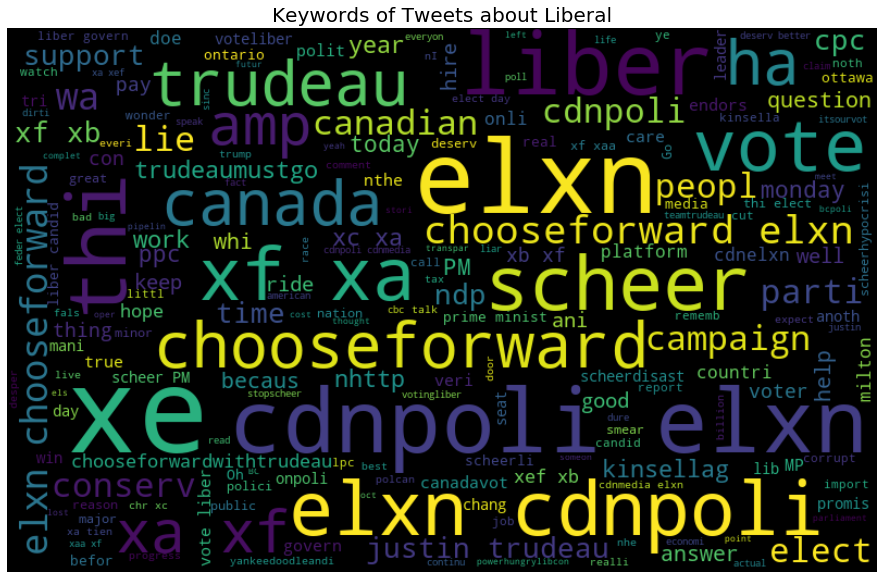

In [ ]:
#Making a wordcloud for identifying keywords for liberals
lib_tweet = ' '.join([text for text in liberal_tweet])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(lib_tweet)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Keywords of Tweets about Liberal', fontsize= 20)
plt.axis('off')
plt.show()

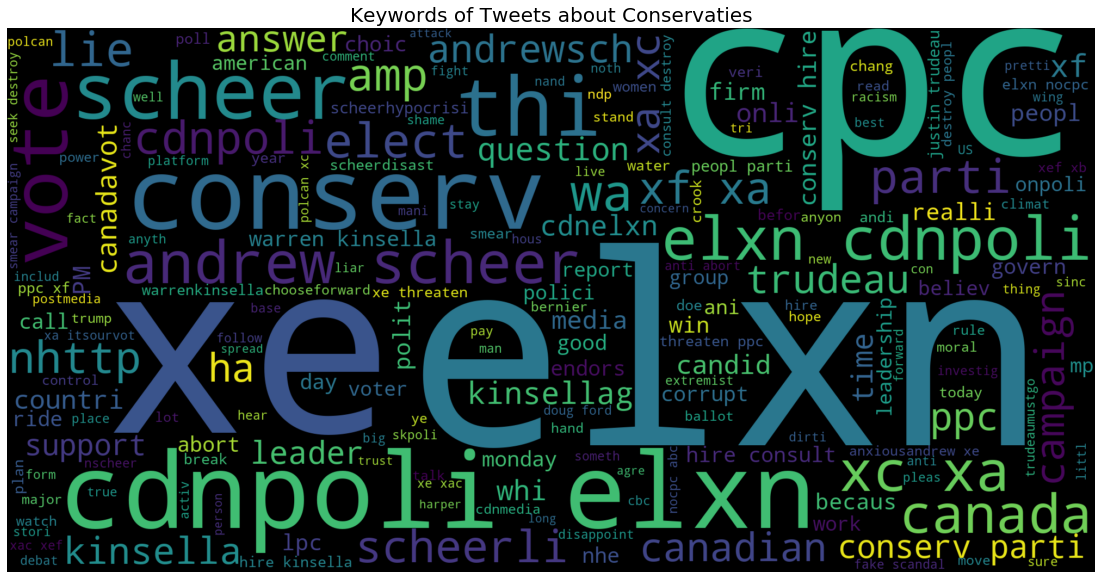

In [ ]:
#Making a wordcloud for identifying keywords for conservatives
cons_tweet = ' '.join([text for text in conservative_tweet])
wordcloud = WordCloud(width = 2000, height = 1000).generate(cons_tweet)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Tweets about Conservaties', fontsize= 20)
plt.axis("off")
plt.show()

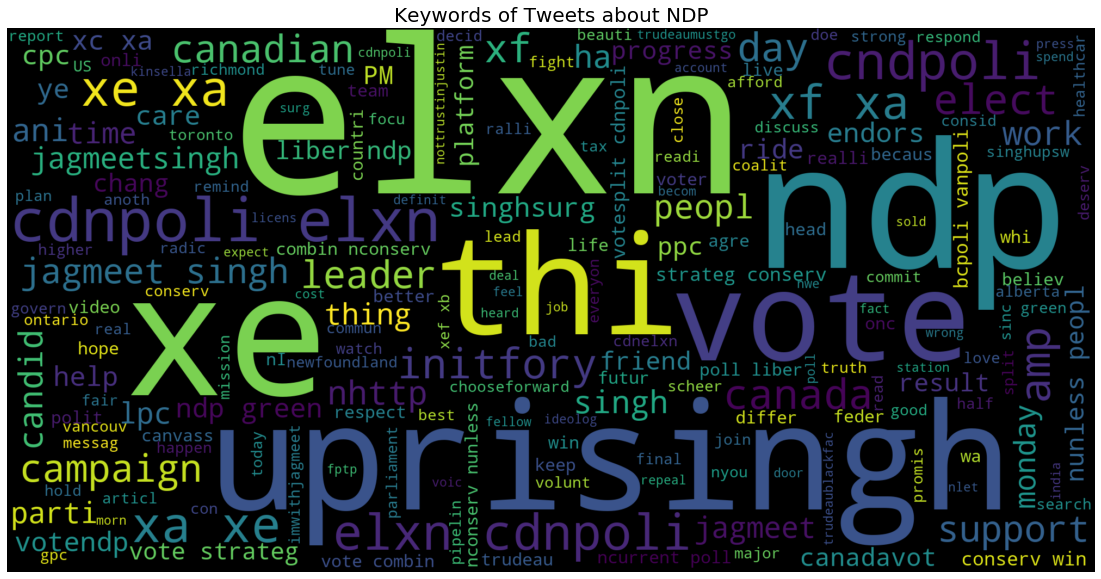

In [ ]:
#Making a wordcloud for identifying keywords for conservatives
ndps_tweet = ' '.join([text for text in ndp_tweet])
wordcloud = WordCloud(width = 2000, height = 1000).generate(ndps_tweet)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Tweets about NDP', fontsize= 20)
plt.axis("off")
plt.show()

In [ ]:
#Using the indexes to get the sentiment for each party
liberal_senti, conservative_senti, ndp_senti= [],[],[]
for i in liberal_index:
    liberal_senti.append(ce_tweets["sentiment"][i])
for i in conservative_index:
    conservative_senti.append(ce_tweets["sentiment"][i])
for i in ndp_index:
    ndp_senti.append(ce_tweets["sentiment"][i])

In [ ]:
#Seperating all the positive and negative sentiment counts for the three party for plotting purposes.

#For negative sentiment tweets
negative= []
negative.append(list(OrderedDict(sorted(Counter(liberal_senti).items())).values())[0])
negative.append(list(OrderedDict(sorted(Counter(conservative_senti).items())).values())[0])
negative.append(list(OrderedDict(sorted(Counter(ndp_senti).items())).values())[0])


#For positive sentiment tweets
positive=[]
positive.append(list(OrderedDict(sorted(Counter(liberal_senti).items())).values())[1])
positive.append(list(OrderedDict(sorted(Counter(conservative_senti).items())).values())[1])
positive.append(list(OrderedDict(sorted(Counter(ndp_senti).items())).values())[1])

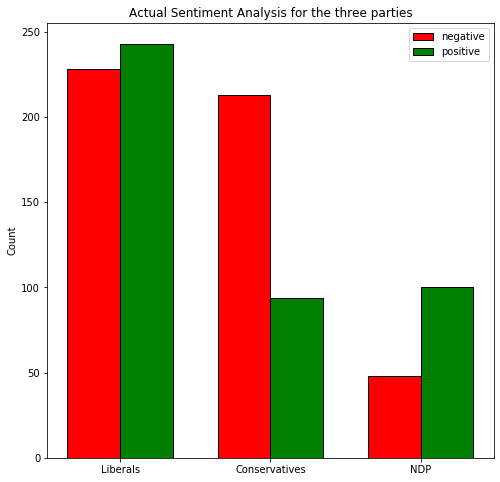

In [ ]:
#Plotting the results for all parties in one plot
plt.figure(figsize=(8, 8))
ind= np.arange(3)
width = 0.35   

plt.bar(ind, negative, width, label='negative',color= 'red', edgecolor= 'black', linewidth= 1)
plt.bar(ind+width, positive, width, label='positive', color= 'green', edgecolor= 'black', linewidth= 1)

plt.xticks(ind+width/2,("Liberals","Conservatives","NDP"))
plt.legend(loc='best')
plt.ylabel("Count")
plt.title("Actual Sentiment Analysis for the three parties")
plt.show()

From the plot we can deduce that Liberals had thenmost number of negative sentiment as well as positive sentiment tweets. Conservatives had negative sentiments tweets almost same as that of the liberals, but lowest number of positive sentiment tweets. For NDP, the negative sentiments tweets were the lowest among the three and had almost the half number of positive sentiment tweets as that of Liberals.

Let us now check the most frequent negative reasons in the canadian elections 2019 tweets dataset

In [ ]:
#Creating a dataframe containing all negative sentiments tweets from the Canadian Elections 2019 tweets dataset
df_negative= ce_tweets[ce_tweets["sentiment"]==0]
#Printing and checking the dataset
df_negative

,sentiment,negative_reason,text,user_names_removed,characters_removed,tokenized_tweet,stop_words_removed
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we...",b So instead of your suggestion how about we...,b So instead of your suggest how about we agre...,So agre #canadian #women trust #andrewsch #con...
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO...",b #Brantford It s going to cost YOU BILLIO...,b #brantford It s go to cost you billion for t...,#brantford It cost billion year justin #elxn #...
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h...",b #Canada #taxpayers are sick amp tired of h...,b #canada #taxpay are sick amp tire of have th...,#canada #taxpay sick amp tire hard earn donat ...
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",b #CanadaVotes #elxn #cdnpoli FACTS ...,b #canadavot #elxn #cdnpoli fact #blastfromthe...,#canadavot #elxn #cdnpoli fact #blastfromthepa...
8,0,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",b #chooseforward #cdnpoli #elxn nCanada Don...,b #chooseforward #cdnpoli #elxn ncanada don t ...,#chooseforward #cdnpoli #elxn ncanada america ...
9,0,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh...",b #CPCKinsellaGate nLet s see the receipts Wh...,b #cpckinsellag nlet s see the receipt who pay...,#cpckinsellag nlet receipt pay warren kinsella...
14,0,Others,"b""#Kinsella runs deep w #CPC...both he and #Ly...","b""#Kinsella runs deep w #CPC...both he and #Ly...",b #Kinsella runs deep w #CPC both he and #Ly...,b #kinsella run deep w #cpc both he and #lying...,#kinsella deep #cpc #lyingandi craze anti trud...
15,0,Tell lies,"b""#LyingAndy has a history of not answering em...","b""#LyingAndy has a history of not answering em...",b #LyingAndy has a history of not answering em...,b #lyingandi ha a histori of not answer embarr...,#lyingandi ha histori answer embarrass questio...
19,0,Scandal,"b""*Urgent* Please watch this video by David Ha...","b""*Urgent* Please watch this video by David Ha...",b Urgent Please watch this video by David Ha...,b urgent pleas watch thi video by david haskel...,urgent pleas watch thi video david haskel peop...
20,0,Others,"b'""... it\'s our policy not to comment on ille...","b'""... it\'s our policy not to comment on ille...",b it s our policy not to comment on ille...,b it s our polici not to comment on illeg immo...,polici comment illeg immor nefari activ #cpc a...


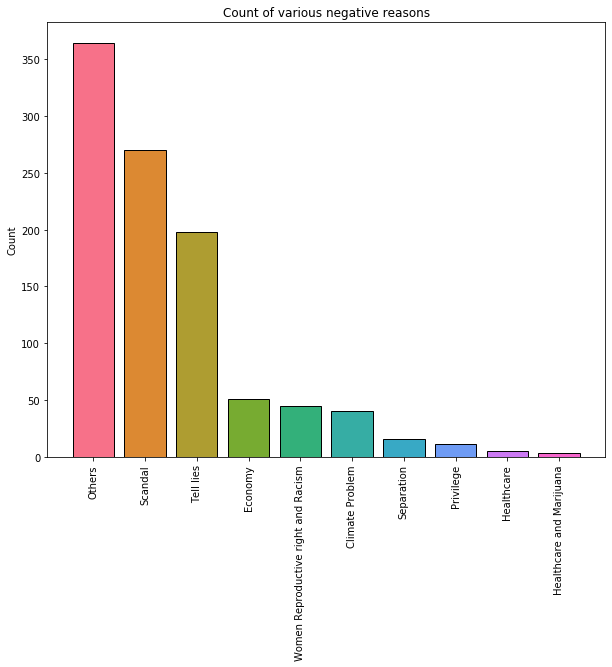

In [ ]:
#Using the operator and collections library to sort the dict values in ascending order of count of tweets
negative_dict= OrderedDict(sorted(Counter(df_negative["negative_reason"]).items(), key=operator.itemgetter(1), reverse= True))
#Splitting the dictionary into data for facilitating easy plotting
y= negative_dict.values()
x= negative_dict.keys()
#Plotting the above data
plt.figure(figsize=(10, 8))
color=sns.color_palette("husl", 10)
plt.bar(x,y,color= color,edgecolor="black",linewidth=1)
plt.ylabel("Count")
plt.title("Count of various negative reasons")
plt.xticks(rotation='vertical')
plt.show()

**OBSERVATION** -  The top three reasons seem to make about 70-80% of the total negative reasons which would make it difficult for the algorithms to classify the data and implement various machine learning algorithms, the dataset formed and applied for model implementation might be skewed.

Now that we've analyzed all the negative reasons from the dataset, let's do the analysis for the negative reasons on each party- Liberals, Conservatives as well as NDP.

In [ ]:
#Using the indexes to get the negative reasons for each party
liberal_reasons, conservative_reasons, ndp_reasons= [],[],[]
for i in liberal_index:
    if ce_tweets["sentiment"][i]== 0:
        liberal_reasons.append(ce_tweets["negative_reason"][i])
for i in conservative_index:
    if ce_tweets["sentiment"][i]== 0:
        conservative_reasons.append(ce_tweets["negative_reason"][i])
for i in ndp_index:
    if ce_tweets["sentiment"][i]== 0:
        ndp_reasons.append(ce_tweets["negative_reason"][i])

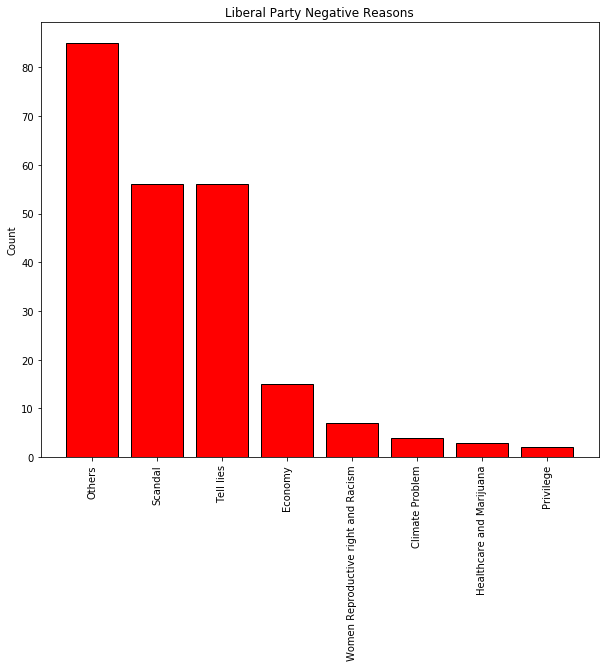

In [ ]:
#Creating a dictionary for the negative reasons and their respective counts for Liberals
reasons_dict= OrderedDict(sorted(Counter(liberal_reasons).items(), key=operator.itemgetter(1), reverse= True))
x= Counter(reasons_dict).keys()
y= Counter(reasons_dict).values()
#Plotting the negative reasons for Liberals
plt.figure(figsize=(10, 8))

plt.bar(x,y,color = 'red',edgecolor="black",linewidth=1)
plt.ylabel("Count")
plt.title("Liberal Party Negative Reasons")
plt.xticks(rotation='vertical')
plt.show()

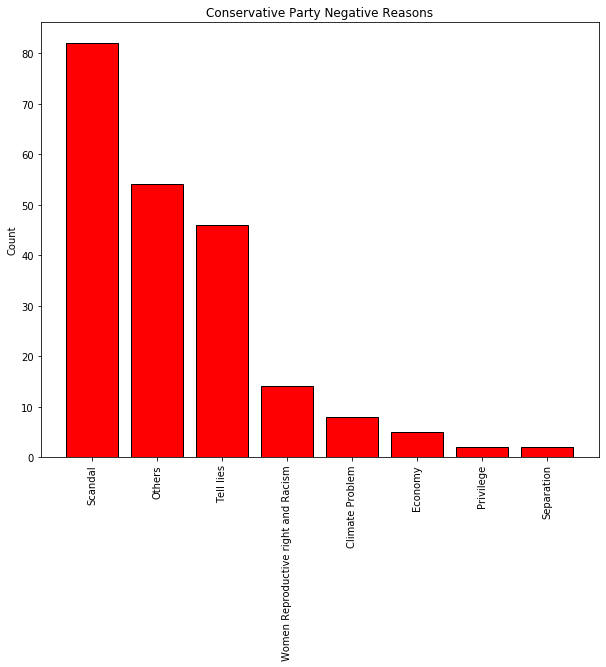

In [ ]:
#Creating a dictionary for the negative reasons and their respective counts for Conservatives
reasons_dict= OrderedDict(sorted(Counter(conservative_reasons).items(), key=operator.itemgetter(1), reverse= True))
x= Counter(reasons_dict).keys()
y= Counter(reasons_dict).values()
#Plotting the negative reasons for Conservatives
plt.figure(figsize=(10, 8))
plt.bar(x,y,color = 'red',edgecolor="black",linewidth=1)
plt.ylabel("Count")
plt.title("Conservative Party Negative Reasons")
plt.xticks(rotation='vertical')
plt.show()

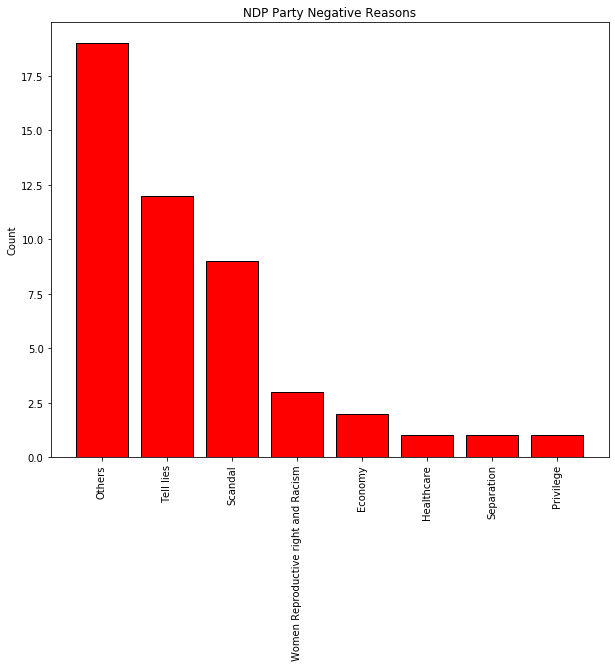

In [ ]:
#Creating a dictionary for the negative reasons and their respective counts for NDP
reasons_dict= OrderedDict(sorted(Counter(ndp_reasons).items(), key=operator.itemgetter(1), reverse= True))
x= Counter(reasons_dict).keys()
y= Counter(reasons_dict).values()
#Plotting the negative reasons for NDP
plt.figure(figsize=(10, 8))
plt.bar(x,y,color = 'red',edgecolor="black",linewidth=1)
plt.ylabel("Count")
plt.title("NDP Party Negative Reasons")
plt.xticks(rotation='vertical')
plt.show()

This analysis clearly tells us that the conservatives mainly were involved in many scandals besides doing some other things as well as telling lies, which led to more negative sentiments tweet against them. For Liberals, other reasons, scandals and telling lies also resulted in the negative sentiment tweets against them.

For NDP, in comparison to Liberals and Conservatives, they had very less number of negative sentiments tweets which can be clearly seen in their analysis above. So this will not contribute in any significant amounts to our analysis.

**Use of Hashtags** - Hashtag Visualization

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

**Carrying out the hashtag visualization for the Sentiment generic tweets dataset.**

In [ ]:
# extracting hashtags from negative sentiments tweets
HT_negative = hashtag_extract(sentiments['stop_words_removed'][sentiments['sentiment'] == 0])

# extracting hashtags from positive sentiments tweets
HT_positive = hashtag_extract(sentiments['stop_words_removed'][sentiments['sentiment'] == 1])

# unnesting list
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])


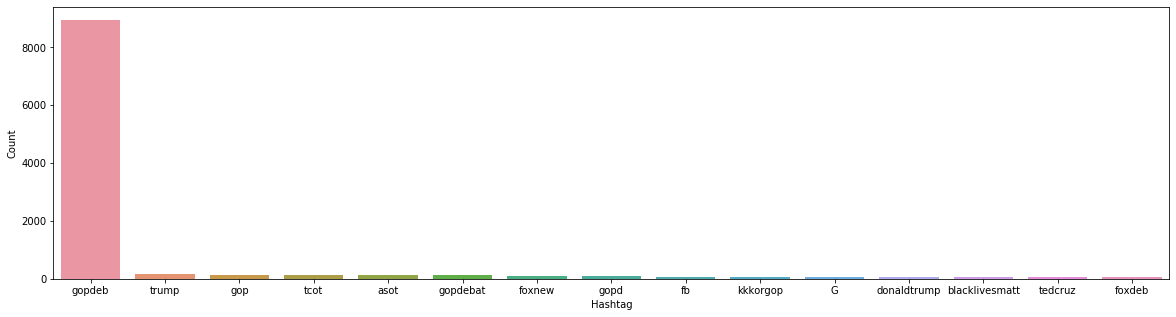

In [ ]:
#Plotting the most used hashtags in the sentiment tweets dataset - negative sentiment
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 15 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

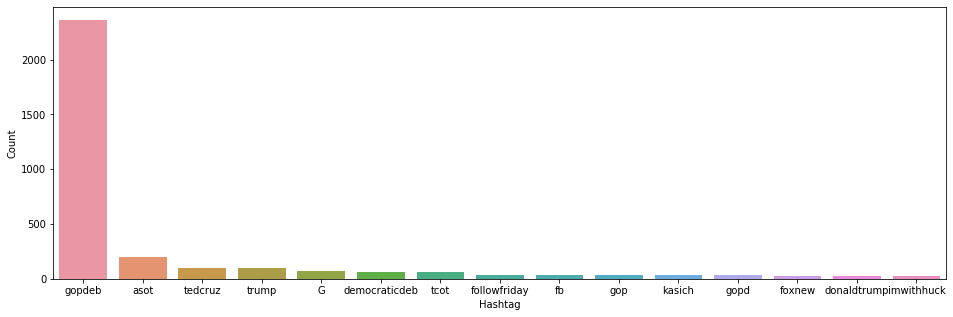

In [ ]:
#Plotting the most used hashtags in the sentiment tweets dataset - positive sentiment
b = nltk.FreqDist(HT_positive)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 15 most frequent hashtags
e = e.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

**OBSERVATION** - The hashtag visualization analysis results for the sentiments of positive, negative have one hashtag of #gopdeb in common. Besides that, the most popular hashtag used in the positive sentiments tweets was #asot, and #trump in the negative sentiments tweets .

**Carrying out the hashtag visualization for the Canadian Elections 2019 tweets dataset.**

In [ ]:
# extracting hashtags from negative sentmients tweets
HT_negative1 = hashtag_extract(ce_tweets['stop_words_removed'][ce_tweets['sentiment'] == 0])

# extracting hashtags from positive sentiments tweets
HT_positive1 = hashtag_extract(ce_tweets['stop_words_removed'][ce_tweets['sentiment'] == 1])


# unnesting list
HT_negative1 = sum(HT_negative1,[])
HT_positive1 = sum(HT_positive1,[])

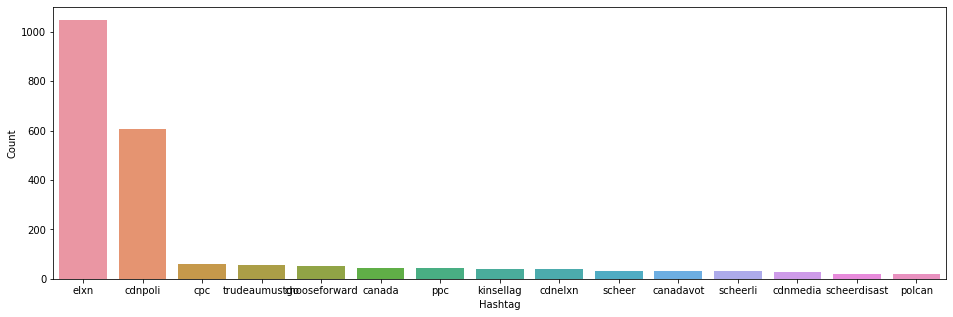

In [ ]:
#Plotting the most used hashtags in the Canadian elections 2019 sentiment tweets dataset - negative sentiment
q = nltk.FreqDist(HT_negative1)
w = pd.DataFrame({'Hashtag': list(q.keys()), 'Count': list(q.values())})

# selecting top 15 most frequent hashtags
w = w.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=w, x= "Hashtag", y = "Count")

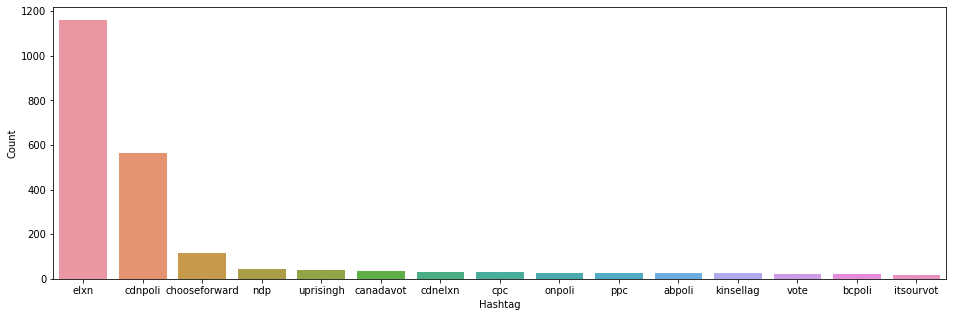

In [ ]:
#Plotting the most used hashtags in the Canadian elections 2019 sentiment tweets dataset - positive sentiment
t = nltk.FreqDist(HT_positive1)
u = pd.DataFrame({'Hashtag': list(t.keys()), 'Count': list(t.values())})

# selecting top 15 most frequent hashtags
u = u.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=u, x= "Hashtag", y = "Count")

**OBSERVATION** - The hashtag visualization analysis results also aligns with the individual parties tweets sentiment analysis results performed above. Besides the common hashtags of #elxn and #cdnpoli, the most used hashtag in the negative sentiment tweets was #cpc, which is connected to the conservation party whereas in the case of positive sentiment tweets, most used one was the #chooseforward which is connected to the Liberals.

# ----------3. Model Preparation----------------

Splitting the generic tweets from Sentiment.csv file randomly into training data (70%) and test data (30%).Trying multiple classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)), where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Trying two different types of features, word frequency (WF) and TF-IDF. The code starts here.

**Carrying out the model preparation using Count Vectorizer & Tfidf Vectorizer** 

In [ ]:
#Splitting the text from the Sentiments generic tweets dataset 
X1 = sentiments["stop_words_removed"]
y1 = sentiments["sentiment"] #target variable
# implementing train-test-split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

**Defining CountVectorizer function**

In [ ]:
#CountVectorizer (Word Frequency) implementation
bag_of_words = CountVectorizer(stop_words = 'english', ngram_range=(1, 2),max_df =0.75,max_features= 5000)
X1_train_BOW = bag_of_words.fit_transform(X1_train)
X1_test_BOW = bag_of_words.transform(X1_test)

**Defining TfidfVectorizer function**

In [ ]:
#Tfidf Method implementation
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df=0.7, max_features= 5500, ngram_range= (1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X1_train)
tfidf_test = tfidf_vectorizer.transform(X1_test)

**1. Logistic Regression Algorithm**

In [ ]:
#Applying CountVectorizer to Logistic Regression 
log_model= LogisticRegression()
log_model.fit(X1_train_BOW,y1_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on Logistic Regression
train_predictions_= log_model.predict(X1_train_BOW)
test_predictions_= log_model.predict(X1_test_BOW)

accuracy_train_ = accuracy_score(y1_train, train_predictions_)
accuracy_test_= accuracy_score(y1_test, test_predictions_)
precision_test_= precision_score(y1_test, test_predictions_)
recall_test_= recall_score(y1_test, test_predictions_)

print("Train Set Accuracy:", accuracy_train_)
print("Test Set Accuracy:", accuracy_test_)
print("Precision of the test set:", precision_test_)
print("Recall of the test set:", recall_test_)

Train Set Accuracy: 0.7726308654392793
Test Set Accuracy: 0.7370730338511773
Precision of the test set: 0.7008365927857453
Recall of the test set: 0.7288288797243093


In [ ]:
#Applying tfidfVectorizer to Logistic Regression 
log_model= LogisticRegression()
log_model.fit(tfidf_train,y1_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on Logistic Regression
train_predictions12= log_model.predict(tfidf_train)
test_predictions12= log_model.predict(tfidf_test)

accuracy_train12 = accuracy_score(y1_train, train_predictions12)
accuracy_test12 = accuracy_score(y1_test, test_predictions12)
precision_test12 = precision_score(y1_test, test_predictions12)
recall_test12 = recall_score(y1_test, test_predictions12)

print("Train Set Accuracy:", accuracy_train12)
print("Test Set Accuracy:", accuracy_test12)
print("Precision of the test set:", precision_test12)
print("Recall of the test set:", recall_test12)

Train Set Accuracy: 0.7726417982245157
Test Set Accuracy: 0.7404913139970919
Precision of the test set: 0.7099040820878876
Recall of the test set: 0.7191684085644878


**2. k-NN Classification Algorithm**

In [ ]:
#Applying CountVectorizer to k-NN neighbors classifier 
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(X1_train_BOW, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on k-NN neighbors classifier 
train_predictions= knnclassifier.predict(X1_train_BOW)
test_predictions= knnclassifier.predict(X1_test_BOW)

accuracy_train = accuracy_score(y1_train, train_predictions)
accuracy_test= accuracy_score(y1_test, test_predictions)
precision_test= precision_score(y1_test, test_predictions)
recall_test= recall_score(y1_test, test_predictions)

print("Train Set Accuracy:", accuracy_train)
print("Test Set Accuracy:", accuracy_test)
print("Precision of the test set:", precision_test)
print("Recall of the test set:", recall_test)

Train Set Accuracy: 0.7658306730222592
Test Set Accuracy: 0.6613861891278283
Precision of the test set: 0.6134139468155967
Recall of the test set: 0.676345969154285


In [ ]:
#Applying tfidfVectorizer to k-NN neighbors classifier 
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(tfidf_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on k-NN neighbors classifier 
train_predictions6= knnclassifier.predict(tfidf_train)
test_predictions6= knnclassifier.predict(tfidf_test)

accuracy_train6 = accuracy_score(y1_train, train_predictions6)
accuracy_test6= accuracy_score(y1_test, test_predictions6)
precision_test6= precision_score(y1_test, test_predictions6)
recall_test6= recall_score(y1_test, test_predictions6)

print("Train Set Accuracy:", accuracy_train6)
print("Test Set Accuracy:", accuracy_test6)
print("Precision of the test set:", precision_test6)
print("Recall of the test set:", recall_test6)

Train Set Accuracy: 0.7521100275506188
Test Set Accuracy: 0.6308257442412183
Precision of the test set: 0.5781197077466492
Recall of the test set: 0.6749901135529066


**3. Naive Bayes Algorithm**

In [ ]:
#Applying CountVectorizer to Naive Bayes Algorithm
nb_classifier = MultinomialNB()
nb_classifier.fit(X1_train_BOW, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on Naive Bayes Algorithm 
train_predictions= knnclassifier.predict(X1_train_BOW)
train_predictions1= nb_classifier.predict(X1_train_BOW)
test_predictions1= nb_classifier.predict(X1_test_BOW)

accuracy_train1 = accuracy_score(y1_train, train_predictions1)
accuracy_test1= accuracy_score(y1_test, test_predictions1)
precision_test1= precision_score(y1_test, test_predictions1)
recall_test1= recall_score(y1_test, test_predictions1)

print("Train Set Accuracy:", accuracy_train1)
print("Test Set Accuracy:", accuracy_test1)
print("Precision of the test set:", precision_test1)
print("Recall of the test set:", recall_test1)

Train Set Accuracy: 0.7444242795294529
Test Set Accuracy: 0.7245478431672662
Precision of the test set: 0.6880823933300637
Recall of the test set: 0.7133495282752387


In [ ]:
#Applying tfidfVectorizer to Naive Bayes Algorithm
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on Naive Bayes Algorithm 
train_predictions7= nb_classifier.predict(tfidf_train)
test_predictions7= nb_classifier.predict(tfidf_test)

accuracy_train7 = accuracy_score(y1_train, train_predictions7)
accuracy_test7= accuracy_score(y1_test, test_predictions7)
precision_test7= precision_score(y1_test, test_predictions7)
recall_test7= recall_score(y1_test, test_predictions7)

print("Train Set Accuracy:", accuracy_train1)
print("Test Set Accuracy:", accuracy_test1)
print("Precision of the test set:", precision_test1)
print("Recall of the test set:", recall_test1)

Train Set Accuracy: 0.7444242795294529
Test Set Accuracy: 0.7245478431672662
Precision of the test set: 0.6880823933300637
Recall of the test set: 0.7133495282752387


**4. SVM Algorithm**

In [ ]:
#Applying CountVectorizer to Support Vector Machine Algorithm
SVM = LinearSVC()
SVM.fit(X1_train_BOW,y1_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on Support Vector Machine Algorithm
train_predictions2= SVM.predict(X1_train_BOW)
test_predictions2= SVM.predict(X1_test_BOW)

accuracy_train2 = accuracy_score(y1_train, train_predictions2)
accuracy_test2= accuracy_score(y1_test, test_predictions2)
precision_test2= precision_score(y1_test, test_predictions2)
recall_test2= recall_score(y1_test, test_predictions2)

print("Train Set Accuracy:", accuracy_train2)
print("Test Set Accuracy:", accuracy_test2)
print("Precision of the test set:", precision_test2)
print("Recall of the test set:", recall_test2)

Train Set Accuracy: 0.773396160405825
Test Set Accuracy: 0.7337567919185735
Precision of the test set: 0.6949753059909813
Recall of the test set: 0.731371108976894


In [ ]:
#Applying tfidfVectorizer to Support Vector Machine Algorithm
SVM = LinearSVC()
SVM.fit(tfidf_train,y1_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on Support Vector Machine Algorithm
train_predictions8= SVM.predict(tfidf_train)
test_predictions8= SVM.predict(tfidf_test)

accuracy_train8 = accuracy_score(y1_train, train_predictions8)
accuracy_test8= accuracy_score(y1_test, test_predictions8)
precision_test8= precision_score(y1_test, test_predictions8)
recall_test8= recall_score(y1_test, test_predictions8)

print("Train Set Accuracy:", accuracy_train8)
print("Test Set Accuracy:", accuracy_test8)
print("Precision of the test set:", precision_test8)
print("Recall of the test set:", recall_test8)

Train Set Accuracy: 0.7765120041981896
Test Set Accuracy: 0.7360781612713961
Precision of the test set: 0.7015178913913092
Recall of the test set: 0.7232359753686233


**5. Decision Trees Classifier**

In [ ]:
#Parameters to be tested for Decision Trees Classifier
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
#Applying CountVectorizer to Decision Trees Classifier
tree_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5)
tree_cv.fit(X1_train_BOW,y1_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}


In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on Decision Trees Classifier
train_predictions3 = tree_cv.predict(X1_train_BOW)
test_predictions3 = tree_cv.predict(X1_test_BOW)

accuracy_train3 = accuracy_score(y1_train, train_predictions3)
accuracy_test3= accuracy_score(y1_test, test_predictions3)
precision_test3= precision_score(y1_test, test_predictions3)
recall_test3= recall_score(y1_test, test_predictions3)

print("Train Set Accuracy:", accuracy_train3)
print("Test Set Accuracy:", accuracy_test3)
print("Precision of the test set:", precision_test3)
print("Recall of the test set:", recall_test3)


Train Set Accuracy: 0.9677373507674816
Test Set Accuracy: 0.6543965715160327
Precision of the test set: 0.6138244806227046
Recall of the test set: 0.6326196260098299


In [ ]:
#Parameters to be tested for Decision Trees
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
#Applying tfidfVectorizer to Decision Trees
tree_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5)
tree_cv.fit(tfidf_train,y1_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 6}


In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on Decision Trees
train_predictions9 = tree_cv.predict(tfidf_train)
test_predictions9 = tree_cv.predict(tfidf_test)

accuracy_train9 = accuracy_score(y1_train, train_predictions9)
accuracy_test9= accuracy_score(y1_test, test_predictions9)
precision_test9= precision_score(y1_test, test_predictions9)
recall_test9= recall_score(y1_test, test_predictions9)

print("Train Set Accuracy:", accuracy_train9)
print("Test Set Accuracy:", accuracy_test9)
print("Precision of the test set:", precision_test9)
print("Recall of the test set:", recall_test9)

Train Set Accuracy: 0.6732190492849959
Test Set Accuracy: 0.6468967628376827
Precision of the test set: 0.5903366262465471
Recall of the test set: 0.7123326365742049


**6. Random Forest**

In [ ]:
#Applying CountVectorizer to Random Forest Classifier
forest_cv = RandomForestClassifier()
forest_cv.fit(X1_train_BOW,y1_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on Random Forest Classifier
train_predictions4= forest_cv.predict(X1_train_BOW)
test_predictions4= forest_cv.predict(X1_test_BOW)

accuracy_train4 = accuracy_score(y1_train, train_predictions4)
accuracy_test4 = accuracy_score(y1_test, test_predictions4)
precision_test4 = precision_score(y1_test, test_predictions4)
recall_test4 = recall_score(y1_test, test_predictions4)

print("Train Set Accuracy:", accuracy_train4)
print("Test Set Accuracy:", accuracy_test4)
print("Precision of the test set:", precision_test4)
print("Recall of the test set:", recall_test4)

Train Set Accuracy: 0.9542353610005685
Test Set Accuracy: 0.7094716971505829
Precision of the test set: 0.6797880824883218
Recall of the test set: 0.6741427038020451


In [ ]:
#Applying tfidfVectorizer to Random Forest Classifier
forest_cv = RandomForestClassifier()
forest_cv.fit(tfidf_train,y1_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on Random Forest Classifier
train_predictions10= forest_cv.predict(tfidf_train)
test_predictions10= forest_cv.predict(tfidf_test)

accuracy_train10 = accuracy_score(y1_train, train_predictions10)
accuracy_test10 = accuracy_score(y1_test, test_predictions10)
precision_test10 = precision_score(y1_test, test_predictions10)
recall_test10 = recall_score(y1_test, test_predictions10)

print("Train Set Accuracy:", accuracy_train10)
print("Test Set Accuracy:", accuracy_test10)
print("Precision of the test set:", precision_test10)
print("Recall of the test set:", recall_test10)

Train Set Accuracy: 0.9528687628460226
Test Set Accuracy: 0.7141654549628836
Precision of the test set: 0.6936330034577322
Recall of the test set: 0.6573074967515959


**7. XGBoost Algorithm**

In [ ]:
#Applying CountVectorizer to XGBoost Algorithm
xgb= XGBClassifier()
xgb.fit(X1_train_BOW, y1_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for CountVectorizer on XGBoost Algorithm
train_predictions5= xgb.predict(X1_train_BOW)
test_predictions5= xgb.predict(X1_test_BOW)

accuracy_train5 = accuracy_score(y1_train, train_predictions5)
accuracy_test5 = accuracy_score(y1_test, test_predictions5)
precision_test5 = precision_score(y1_test, test_predictions5)
recall_test5 = recall_score(y1_test, test_predictions5)

print("Train Set Accuracy:", accuracy_train5)
print("Test Set Accuracy:", accuracy_test5)
print("Precision of the test set:", precision_test5)
print("Recall of the test set:", recall_test5)

Train Set Accuracy: 0.7312174749639218
Test Set Accuracy: 0.7156705186092192
Precision of the test set: 0.6596055514974434
Recall of the test set: 0.7652110050279646


In [ ]:
#Applying tfidfVectorizer to XGBoost Algorithm
xgb= XGBClassifier()
xgb.fit(tfidf_train, y1_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [ ]:
#Determining the train, test accuracy and the precision and recall score for tfidfVectorizer on XGBoost Algorithm
train_predictions11= xgb.predict(tfidf_train)
test_predictions11= xgb.predict(tfidf_test)

accuracy_train11 = accuracy_score(y1_train, train_predictions11)
accuracy_test11 = accuracy_score(y1_test, test_predictions11)
precision_test11 = precision_score(y1_test, test_predictions11)
recall_test11 = recall_score(y1_test, test_predictions11)

print("Train Set Accuracy:", accuracy_train11)
print("Test Set Accuracy:", accuracy_test11)
print("Precision of the test set:", precision_test11)
print("Recall of the test set:", recall_test11)

Train Set Accuracy: 0.7383565837232693
Test Set Accuracy: 0.7152113466493202
Precision of the test set: 0.6586727511044226
Recall of the test set: 0.7665103666459522


# ------------4. Model Implementation----------------

**Logistic Regression with CountVectorizer produced the best test accuracy of 73.7% and hence this will be used and applied on the Canadian elections 2019 tweets dataset.**

In [ ]:
#Splitting the data from the Canadian ELections 2019 tweets dataset
X_eln= ce_tweets["stop_words_removed"] 
y_eln= ce_tweets["sentiment"]

The same CountVectorizer, used above, will be used to transform the test data (which in this is case of Canadian election tweets 2019 dataset).

In [ ]:
#Fitting the dataset to the CountVectorizer mentioned above
X_eln_wf = bag_of_words.transform(X_eln)

In [ ]:
#Implementing the Logistic Regression Algorithm
log_model= LogisticRegression()
log_model.fit(X1_train_BOW,y1_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Determining the accuracy of the model on the Canadian Elections 2019 tweets dataset
eln_sentiment_pred= log_model.predict(X_eln_wf) 
accuracy = accuracy_score(y_eln,eln_sentiment_pred)
print("Elections Sentiment Prediction Accuracy:", accuracy*100)

Elections Sentiment Prediction Accuracy: 64.32255039849977


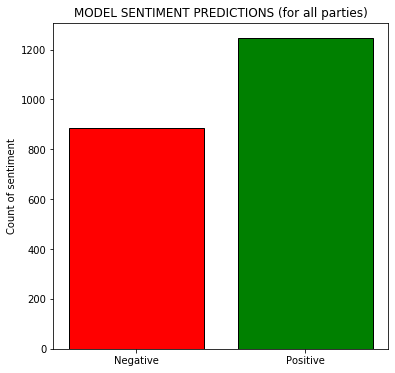

In [ ]:
#Model predicted sentiment 
y_pm= OrderedDict(sorted(Counter(eln_sentiment_pred).items())).values()
x_pm= ['Negative','Positive']

plt.figure(figsize=(6, 6))
plt.bar(x_pm,y_pm,edgecolor="black",linewidth=1, color=["red","green"])
plt.ylabel("Count of sentiment")
plt.title("MODEL SENTIMENT PREDICTIONS (for all parties)")
plt.show()


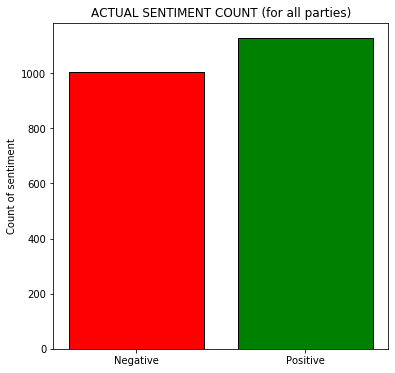

In [ ]:
#Actual sentiment
y_am= OrderedDict(sorted(Counter(ce_tweets["sentiment"]).items())).values()
x_am= ['Negative','Positive']

plt.figure(figsize=(6, 6))
plt.bar(x_am,y_am,edgecolor="black",linewidth=1, color=["red","green"])
plt.ylabel("Count of sentiment")
plt.title("ACTUAL SENTIMENT COUNT (for all parties)")
plt.show()

As the accuracy of 65% suggested, the results differ in small  but mainly for the positive tweets. It looks like our model has somehwhat failed to classify the negative tweets and considered them as positive instead. We can see a minute change in the sentiment prediction by the model as compared to the actual sentiment prediction.


Visualizing the sentiment prediction results and the true sentiment for each of the 3 parties, Liberals, Conservatives and NDP.

In [ ]:
#Using the model to predict sentiments just for the liberal party
liberal_tfidf= bag_of_words.transform(liberal_tweet)
liberal_pred= log_model.predict(liberal_tfidf)

In [ ]:
#Using the model to predict sentiments just for the conservative party
conservative_tfidf= bag_of_words.transform(conservative_tweet)
conservative_pred= log_model.predict(conservative_tfidf)

In [ ]:
#Using the model to predict sentiments just for the NDP
ndp_tfidf= bag_of_words.transform(ndp_tweet)
ndp_pred= log_model.predict(ndp_tfidf)

In [ ]:
#This is created for plotting purposes. Seperating all the positive and negative sentiment counts for the three party
negative= []
negative.append(list(OrderedDict(sorted(Counter(liberal_pred).items())).values())[0])
negative.append(list(OrderedDict(sorted(Counter(conservative_pred).items())).values())[0])
negative.append(list(OrderedDict(sorted(Counter(ndp_pred).items())).values())[0])

positive=[]
positive.append(list(OrderedDict(sorted(Counter(liberal_pred).items())).values())[1])
positive.append(list(OrderedDict(sorted(Counter(conservative_pred).items())).values())[1])
positive.append(list(OrderedDict(sorted(Counter(ndp_pred).items())).values())[1])

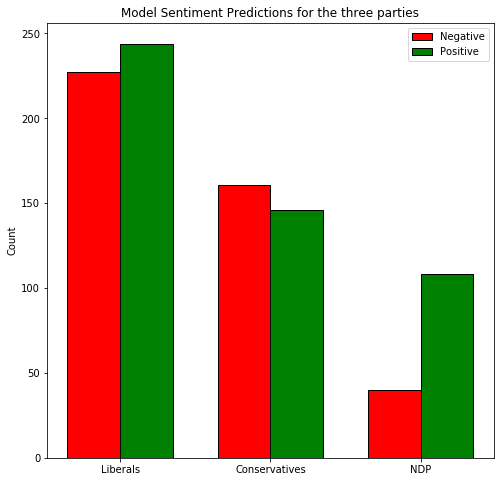

In [ ]:
#Plotting the results for all parties in one plot
plt.figure(figsize=(8, 8))
ind= np.arange(3)
width = 0.35   

plt.bar(ind, negative, width, label='Negative',color= 'red', edgecolor= 'black', linewidth= 1)
plt.bar(ind+width, positive, width, label='Positive', color= 'green', edgecolor= 'black', linewidth= 1)
plt.xticks(ind+width/2,("Liberals","Conservatives","NDP"))
plt.legend(loc='best')
plt.ylabel("Count")
plt.title("Model Sentiment Predictions for the three parties")
plt.show()

Our model predicts some of the negative reasons under the positive sentiment tweets hence we can see a marginal increase in the number of positive sentiment tweets.

**Hyperparameter Tuning**

In [ ]:
#Creating the dataframe for storing the values of the accuracies
sentiments_train_accuracy= pd.DataFrame()
sentiments_test_accuracy= pd.DataFrame()
cdn_elections_accuracy= pd.DataFrame()

In [ ]:
#Hyperparameter Tuning  
X_eln= ce_tweets["stop_words_removed"] 
y_eln= ce_tweets["sentiment"]

ngrams= [(1,1),(1,2),(2,2)]
i=0

for i in range (0,3): #loop for the different ngram options
    accuracy_train= []
    accuracy_test= []
    accuracy_elections= []
    for features in range(500,8000,500): #loop for the different count of features
    
        bag_of_words = CountVectorizer(stop_words = "english", ngram_range= ngrams[i],max_df =0.75,max_features=features)
        X1_train_BOW = bag_of_words.fit_transform(X1_train)
        X1_test_BOW =  bag_of_words.transform(X1_test)
        X_elections_BOW = bag_of_words.transform(X_eln)

        log_model= LogisticRegression()
        log_model.fit(X1_train_BOW,y1_train)

        train_pred= log_model.predict(X1_train_BOW)
        test_pred= log_model.predict(X1_test_BOW)
        sentiment_pred= log_model.predict(X_elections_BOW)
        
        accuracy_train.append(accuracy_score(y1_train, train_pred))
        accuracy_test.append(accuracy_score(y1_test, test_pred))
        accuracy_elections.append(accuracy_score(y_eln, sentiment_pred))
    
    #saving the results in a dataframe for each ngram range choice
    sentiments_train_accuracy["Ngram selected: %d" %i]= accuracy_train
    sentiments_test_accuracy["Ngram selected: %d" %i]= accuracy_test
    cdn_elections_accuracy["Ngram selected: %d" %i]= accuracy_elections

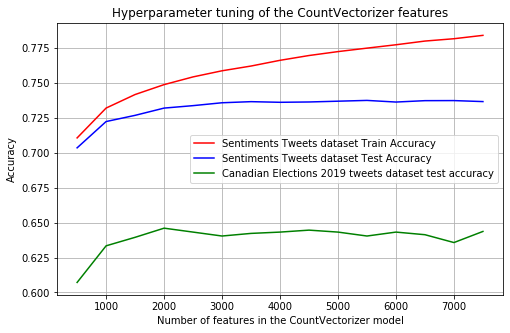

In [ ]:
#Plotting the hyperparameter tuning for train, test accuracies
plt.figure(figsize=(8,5))
plt.plot(range(500,8000, 500), sentiments_train_accuracy.iloc[:,1], 'r')
plt.plot(range(500,8000, 500), sentiments_test_accuracy.iloc[:,1], 'b')
plt.plot(range(500,8000, 500), cdn_elections_accuracy.iloc[:,1], 'g')

plt.grid()
plt.xlabel("Number of features in the CountVectorizer model")
plt.title("Hyperparameter tuning of the CountVectorizer features")
plt.ylabel("Accuracy")
plt.legend(["Sentiments Tweets dataset Train Accuracy", "Sentiments Tweets dataset Test Accuracy", "Canadian Elections 2019 tweets dataset test accuracy"])
plt.show()

**Part-II**

Splitting the negative 2019 Canadian elections tweets into training data (70%) and test data (30%) and using the sentiment labels in the 2019 Canadian elections data instead of the predictions from the previous part

In [ ]:
#Building a Dataframe of all the negative sentiment tweets from the Canadian Elections 2019 tweets dataset 
ce_negative = ce_tweets[ce_tweets["sentiment"]==0]
ce_negative

,sentiment,negative_reason,text,user_names_removed,characters_removed,tokenized_tweet,stop_words_removed
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","b"" So instead of your suggestion, how about we...",b So instead of your suggestion how about we...,b So instead of your suggest how about we agre...,So agre #canadian #women trust #andrewsch #con...
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","b""#Brantford It's going to cost YOU $94 BILLIO...",b #Brantford It s going to cost YOU BILLIO...,b #brantford It s go to cost you billion for t...,#brantford It cost billion year justin #elxn #...
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","b""#Canada #taxpayers are sick &amp; tired of h...",b #Canada #taxpayers are sick amp tired of h...,b #canada #taxpay are sick amp tire of have th...,#canada #taxpay sick amp tire hard earn donat ...
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",b #CanadaVotes #elxn #cdnpoli FACTS ...,b #canadavot #elxn #cdnpoli fact #blastfromthe...,#canadavot #elxn #cdnpoli fact #blastfromthepa...
8,0,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",b #chooseforward #cdnpoli #elxn nCanada Don...,b #chooseforward #cdnpoli #elxn ncanada don t ...,#chooseforward #cdnpoli #elxn ncanada america ...
9,0,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...","b""#CPCKinsellaGate\nLet's see the receipts. Wh...",b #CPCKinsellaGate nLet s see the receipts Wh...,b #cpckinsellag nlet s see the receipt who pay...,#cpckinsellag nlet receipt pay warren kinsella...
14,0,Others,"b""#Kinsella runs deep w #CPC...both he and #Ly...","b""#Kinsella runs deep w #CPC...both he and #Ly...",b #Kinsella runs deep w #CPC both he and #Ly...,b #kinsella run deep w #cpc both he and #lying...,#kinsella deep #cpc #lyingandi craze anti trud...
15,0,Tell lies,"b""#LyingAndy has a history of not answering em...","b""#LyingAndy has a history of not answering em...",b #LyingAndy has a history of not answering em...,b #lyingandi ha a histori of not answer embarr...,#lyingandi ha histori answer embarrass questio...
19,0,Scandal,"b""*Urgent* Please watch this video by David Ha...","b""*Urgent* Please watch this video by David Ha...",b Urgent Please watch this video by David Ha...,b urgent pleas watch thi video by david haskel...,urgent pleas watch thi video david haskel peop...
20,0,Others,"b'""... it\'s our policy not to comment on ille...","b'""... it\'s our policy not to comment on ille...",b it s our policy not to comment on ille...,b it s our polici not to comment on illeg immo...,polici comment illeg immor nefari activ #cpc a...


In [ ]:
#Displaying 10 negative reasons for the negative sentiments in the Canadian elections 2019 tweets dataset
ce_negative["negative_reason"].value_counts(normalize=True)

Others                                 0.361829
Scandal                                0.268390
Tell lies                              0.196819
Economy                                0.050696
Women Reproductive right and Racism    0.044732
Climate Problem                        0.040755
Separation                             0.015905
Privilege                              0.011928
Healthcare                             0.004970
Healthcare and Marijuana               0.003976
Name: negative_reason, dtype: float64

There is imbalanced data with most of the data being available for the top 3 category: Other, Scandal and Tell Lies cover about 80% of the total reasons.

In [ ]:
#Splitting the data into the data and the target variable
X2= ce_negative["stop_words_removed"]
y2= ce_negative["negative_reason"]
#Splitting the data into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = 42)

In [ ]:
#Applying CountVectorizer on the above split data
bag_of_words1 = CountVectorizer(stop_words = 'english', ngram_range=(1, 2),max_df =0.75,max_features= 500)
X2_train_BOW = bag_of_words1.fit_transform(X2_train)
X2_test_BOW = bag_of_words1.transform(X2_test)

There are three models chosen for this scenario:

1. SVM
2. Naive Bayes
3. XGBoost

These were chosen because they gave the best results in the above analysed section.

**1. SVM Algorithm**

In [ ]:
#Applying the SVM Algorithm
SVM1 = LinearSVC()
SVM1.fit(X2_train_BOW,y2_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
#Determining the train, test accuracy on SVM Algorithm
train_predictions14= SVM1.predict(X2_train_BOW)
test_predictions14= SVM1.predict(X2_test_BOW)

accuracy_train14 = accuracy_score(y2_train, train_predictions14)
accuracy_test14 = accuracy_score(y2_test, test_predictions14)


print("Train Set Accuracy:", accuracy_train14)
print("Test Set Accuracy:", accuracy_test14)


Train Set Accuracy: 0.9900568181818182
Test Set Accuracy: 0.5364238410596026


**2. Naive Bayes Algorithm**

In [ ]:
#Applying the Naive Bayes Algorithm
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(X2_train_BOW, y2_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Determining the train, test accuracy on Naive Bayes Algorithm
train_predictions15= nb_classifier1.predict(X2_train_BOW)
test_predictions15= nb_classifier1.predict(X2_test_BOW)

accuracy_train15 = accuracy_score(y2_train, train_predictions15)
accuracy_test15= accuracy_score(y2_test, test_predictions15)

print("Train Set Accuracy:", accuracy_train15)
print("Test Set Accuracy:", accuracy_test15)

Train Set Accuracy: 0.7514204545454546
Test Set Accuracy: 0.5033112582781457


**3. XGBoost Algorithm**

In [ ]:
#Applying the XGBoost Algorithm
xgb1= XGBClassifier()
xgb1.fit(X2_train_BOW, y2_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
#Determining the train, test accuracy on XGBoost Algorithm
train_predictions13= xgb1.predict(X2_train_BOW)
test_predictions13= xgb1.predict(X2_test_BOW)

accuracy_train13 = accuracy_score(y2_train, train_predictions13)
accuracy_test13 = accuracy_score(y2_test, test_predictions13)

print("Train Set Accuracy:", accuracy_train13)
print("Test Set Accuracy:", accuracy_test13)


Train Set Accuracy: 0.9857954545454546
Test Set Accuracy: 0.5794701986754967


**OBSERVATION**- The Test set accuracy for all the models is lower than the previous cases where the CountVectorizer was implemented keeping the sentiments as the target variable.

Grouping the set of negative reasons together in order to increase the accuracy of the model. Grouping the reasons having low percentage as the first three reasons toghether make almost 85%.  

In this case, will only be applying the XGBoost Algorithm model as it has the highest accuracies among the three models implemented above.

In [ ]:
#Grouping some of the negative reasons into one in order to check whether it contributes into increasing the accuracy of the model
ce_negative[ce_negative.loc[:,"negative_reason"]== "Healthcare"]= "Healthcare, Marijuana, Seperation and Privilege"
ce_negative[ce_negative.loc[:,"negative_reason"]== "Privilege"]=  "Healthcare, Marijuana, Seperation and Privilege"
ce_negative[ce_negative.loc[:,"negative_reason"]== "Separation"]= "Healthcare, Marijuana, Seperation and Privilege"
ce_negative[ce_negative.loc[:,"negative_reason"]== "Healthcare and Marijuana"]="Healthcare, Marijuana, Seperation and Privilege"

ce_negative[ce_negative.loc[:,"negative_reason"]== "Economy"]= "Climate Problem and Economy"
ce_negative[ce_negative.loc[:,"negative_reason"]== "Climate Problem"]= "Climate Problem and Economy"

ce_negative[ce_negative.loc[:,"negative_reason"]== "Economy"]= "Climate Problem and Economy"
ce_negative[ce_negative.loc[:,"negative_reason"]== "Climate Problem"]= "Climate Problem and Economy"

C:\Users\Shreyas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shreyas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Shreyas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
#Checking whether the reasons have merged and decreased
ce_negative["negative_reason"].value_counts(normalize= True)

Others                                             0.361829
Scandal                                            0.268390
Tell lies                                          0.196819
Climate Problem and Economy                        0.091451
Women Reproductive right and Racism                0.044732
Healthcare, Marijuana, Seperation and Privilege    0.036779
Name: negative_reason, dtype: float64

In [ ]:
#Again splitting the data into target variable and the data, after grouping the negative reasons
X3= ce_negative["stop_words_removed"]
y3= ce_negative["negative_reason"]
#Splitting the data into train and test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state = 42)

In [ ]:
#Applying CountVectorizer on the above split data
bag_of_words2 = CountVectorizer(stop_words = 'english', ngram_range=(1, 2),max_df =0.75,max_features= 200)
X3_train_BOW = bag_of_words2.fit_transform(X3_train)
X3_test_BOW = bag_of_words2.transform(X3_test)

In [ ]:
#Applying the XGBoost Algorithm, after grouping the negative reasons
xgb2= XGBClassifier()
xgb2.fit(X3_train_BOW, y3_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
#Determining the train, test accuracy on XGBoost Algorithm, after grouping the negative reasons
train_predictions16= xgb2.predict(X3_train_BOW)
test_predictions16= xgb2.predict(X3_test_BOW)

accuracy_train16 = accuracy_score(y3_train, train_predictions16)
accuracy_test16 = accuracy_score(y3_test, test_predictions16)

print("Train Set Accuracy:", accuracy_train16)
print("Test Set Accuracy:", accuracy_test16)


Train Set Accuracy: 0.9801136363636364
Test Set Accuracy: 0.6324503311258278


**The test set accuracy has been increased from 58% to 63%. This is because the reasons with lower percentage were grouped together.**

**Creating Confusion Matrix for better visualizations**

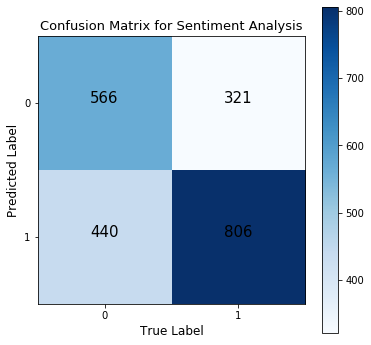

In [ ]:
# Lets create a confusion matrix to visualize the predictions
#defining the confusion matrix
cm = confusion_matrix(eln_sentiment_pred,y_eln,labels= np.unique(y1))
cmDF = pd.DataFrame()

for i, row in enumerate(np.unique(y1)):
    temp = {}
    for j, col in enumerate( np.unique(y1)): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

#Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Sentiment Analysis', fontsize=13)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y1)))
plt.xticks(tick_marks, np.unique(y1), fontsize=10)
plt.yticks(tick_marks, np.unique(y1), fontsize=10)
plt.xlabel('True Label', fontsize=12)
plt.ylabel('Predicted Label', fontsize=12)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] < 0:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

As it can be seen, the negative tweets may not have been classified well. In this case, there are 440 instances of negative tweets which are classified as positive. There are also 321 instances of positive tweets classified as negative. This can also be noticed from the comparison of the actual and model sentiment analysis done above.

There could be numerous reasons for this. Firstly, there is a timeline gap between the Sentiments dataset (the generic one) and the Canadian Elections 2019 tweets dataset, the model prerparation on the generic dataset doesn't necessarily implement well on the Elections dataset. There are many evolving ways for the people to express their opinions, the recent one being the obsession with Twitter. Also, a lot of sentiments are expressed through new age methods such as emojis which was not even considered for the models. There can be cases where people could have expressed their opinions sarcastically and it could have been classified in a wrong sentiment.

The sentiment analysis prediction accuracy was obtained to be 63.24%.

# --------5. Results--------

**--------Explain how each party is viewed in the public eye based on the sentiment value.--------**

**Liberals** - The actual and the predicted sentiment predictions for the Liberals had some contrast. The actual sentiment model for the Liberals had more positive sentiment tweets than that in the predicted sentiment model. There were more tweets predicted negative in the predicted sentiment models. But altogether, the liberals seems to have been constantly in the limelight as the people were constantly talking about them. It is probably why the Liberals were able to nail the elections.

**Conservatives** - The same trend of the model failing to classify the negative tweets properly was observed. However, the actual positive tweets observed are still lower than that of the Liberals. They are seen as negative in the eyes of the people on social media, which the hashtag visualizations done above also suggest. It is probably why they were left behind by the Liberals in the recent elections.

**NDP**: Despite the overall count of the tweets being low, the model did a better job in classifying the tweets for this party. This means that NDP was not as much discussed on the social media as compared to the Liberals and the Conservatives,  which gives an idea about their popularity in the country. However, they are the only party amongst the three who have more positive tweets than negative ones. NDP could use this information to focus on more reasons to concentrate on their shortcomings and could fare well in the next elections.

**--------Discuss whether NLP analytics based on tweets is useful for political parties during election campaigns.--------**

Sentiment analysis always has been used quite often in data science, mainly for retrieving the sentiments of the customers based on the reviews of the products or a service. This plays an essential role in providing the essential areas where the product or the service can be improved, thus giving a superior product/service.

One way that NLP analytics can be used is in the sentiment analysis on the tweets before any big event, as Canadian Elections in our case. It can be used to detect the current mood of the people as many of the people nowadays resort to online platforms like twitter to express what they feel about a certain event. The sentiment analysis done for an election campaign can be used in many ways by the parties participating, they could analyze the negative sentiment , if it exists and can also extract reasons for the sentiment. They can use this information to prioritize the issues and concerns of the public sentiment and can influence elections to a large extent.

A good example of how sentiment analysis can be closely related to the actual outcome of the elections can be seen from our example. The negative reasons behind the negative tweets for the conservatives were mainly the leaders of the party involved in the scandals, telling lies and some other reasons. This could actually be one of the major reasons why Liberals got an upper hand in the recent elections. But at the same time same reasons propped out for the negative tweets on the Liberals which probably could be the reason they weren't able to gain a full majority in the parliament like the last time. Such information can play a crucial role in determining major things such as the agenda of the elections.


**--------How can we improve the accuracy of the models we implemented?--------**


--->  Sentiment Predictions tweets model accuracy could be increased by:

1. Incorporating the emoticons and translating them into words so it would help assess sentiment more precisely.
2. Updating the dataset used to prepare model(in our case Sentiments dataset) to match the current and recent trends in order to improve the accuracy of the model implementation on the target dataset(in our case Canadian Election 2019 dataset).
3. Using the hyperparameter tuning for the models that are implemented (in order to identify optimal parameters which in turn can help in boosting the accuracy of the model).


--->  Canadian Elections 2019 tweets model accuracy could be increased by:

1. Using more advanced ML algorithms such as deep neural networks for more accurate results of the sentiment analysis.
2. Creating more data in the form of more categories in order to create a balanced dataset. For instance having some more reasons in the others category of the negative reasons in our example.
3. Using the hyperparameter tuning for the models that are implemented (in order to identify optimal parameters which in turn can help in boosting the accuracy of the model).
4. In our case, accuracy can also be increased by grouping the more weighted options (the first three options in the negative reasons in our case), but this would fail to account for rest of the categories and even if we'll get the accuracy boosted, it would still be on the skewed dataset. 

**------- For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.--------**

As already mentioned above that the prediction of the correct negative reasons could be because of number of reasons getting concentrated in the top three reasons out of which, the 'others' reasons is non definitive. It would have helped if that reason could have been broken down further into some other options and then we could have been able to regroup the reasons more effectively, thus contributing in improving the accuracy of the model.

Further, we can explain this by creating a confusion matrix of the reasons, so as to support the above mentioned reasoning further.

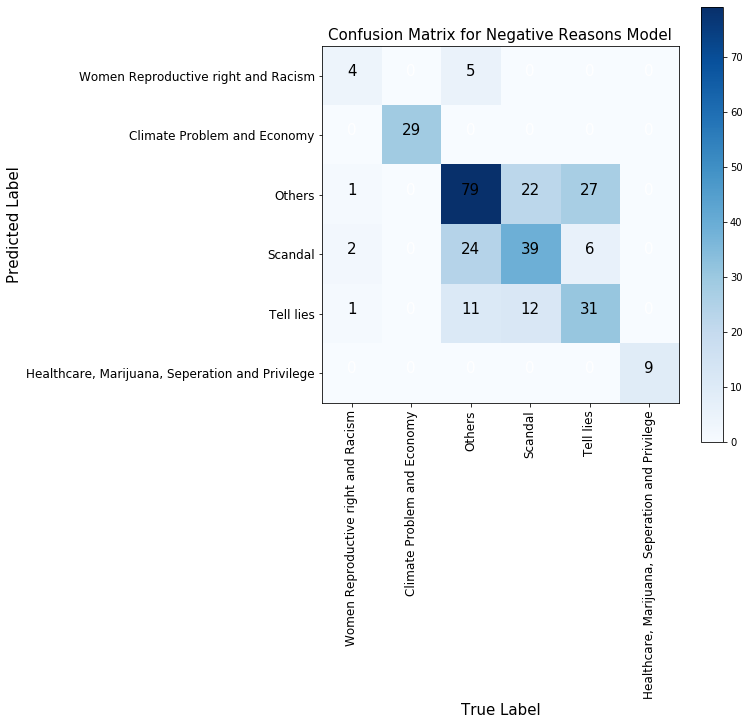

In [ ]:
#using the code snippet used above for plotting the confusion matrix.
#defining the confusion matrix

cm = confusion_matrix(test_predictions16,y3_test, labels= y3.unique())
cmDF = pd.DataFrame()

for i, row in enumerate(y3.unique()):
    temp = {}
    for j, col in enumerate(y3.unique()): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))


plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Negative Reasons Model', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y3.unique()))
plt.xticks(tick_marks, y3.unique(), rotation=90,fontsize=12)
plt.yticks(tick_marks, y3.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] < 1:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

Since accuracy may not be a good measure when the dataset is skewed, confusion matrix is plotted which allows us to understand how many times were the predicted and the true labels the same.

As can be seen from the confusion matrix above, the data in majority is being classified in mainly three reasons (which account almost 85% in the dataset) and therefore is contributing in creating bias in the model. In particular, the 'others' reason listed in the negative reasons seems to go overboard in dominating, so it can be broken down further into individual reasons so that the split is balanced and that would also help in an efficient regrouping as we did above, which could further lead to an increase in the accuracy of the model.

Since, three reasons( other, scandals and telling lies) constituted almost 85% of the reasons column in the dataset, as discussed above it can lead to a skewed dataset, which further could've resulted in the accuracy being somewhat compromised.